# Project 2: Digit Classification Naive Bayes

**Solution**

# Intro
---
In this project, you'll continue working on your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b>


## Grading
---
 - Make sure to answer every part in every question.
 - There are 6 questions, each equally weighted and an additional bonus question.
 - The extra credit question will be graded based on your attempts at feature engineering and resulting improved accuracy.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean, well commented,
  -  if the functions or answers are too long.

## Requirements:
---
1. Comment your code.
1. All graphs should have titles, label for each axis, and if needed a legend. It should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning keep things in functions).

## Additional Reading and notes
---
If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [3]:
import sklearn
sklearn.__version__

'0.24.1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False, as_frame=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Applying a smoothing using numpy.
---

A common image processing technique is to smooth an image by **blurring**. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

1. Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.
1. Choose some weights as a starting point. Produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
  1. Do not use the filter
  1. Filter the training data but not the dev data
  1. Filter the dev data but not the training data
  1. Filter both training data and dev data
1. Show the accuracies of the four models evaluated as described. What do you see? Can you explain why this is?
1. Experiment with weights that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* A good trick to simplify your code is to use numpy's pad function to add 0s around your original array so you don't have to deal with "edge cases".
* In addition, you can use numpy to multiply and sum slices of two arrays.
* [This notebook](https://colab.research.google.com/drive/1eJXTQLtREXQjQIsLOA9uCrBl6B049-pO) might help shows some example numpy code.
* In general, [numpy operations will be much faster than for loops](https://colab.research.google.com/drive/1KJI4JtuIqVdyZHTTe_mAlKYA5XdLFp3_). 
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but in this question, please implement your own.

Accuracy with no filter: 0.884
Accuracy with filter on Training Data ONLY: 0.904
Accuracy with filter on Dev Data ONLY: 0.87
Accuracy with filter on BOTH Training and Dev: 0.9
Weight: 0.5 Accuracy: 0.901
Weight: 1 Accuracy: 0.9
Weight: 2 Accuracy: 0.901
Weight: 5 Accuracy: 0.888


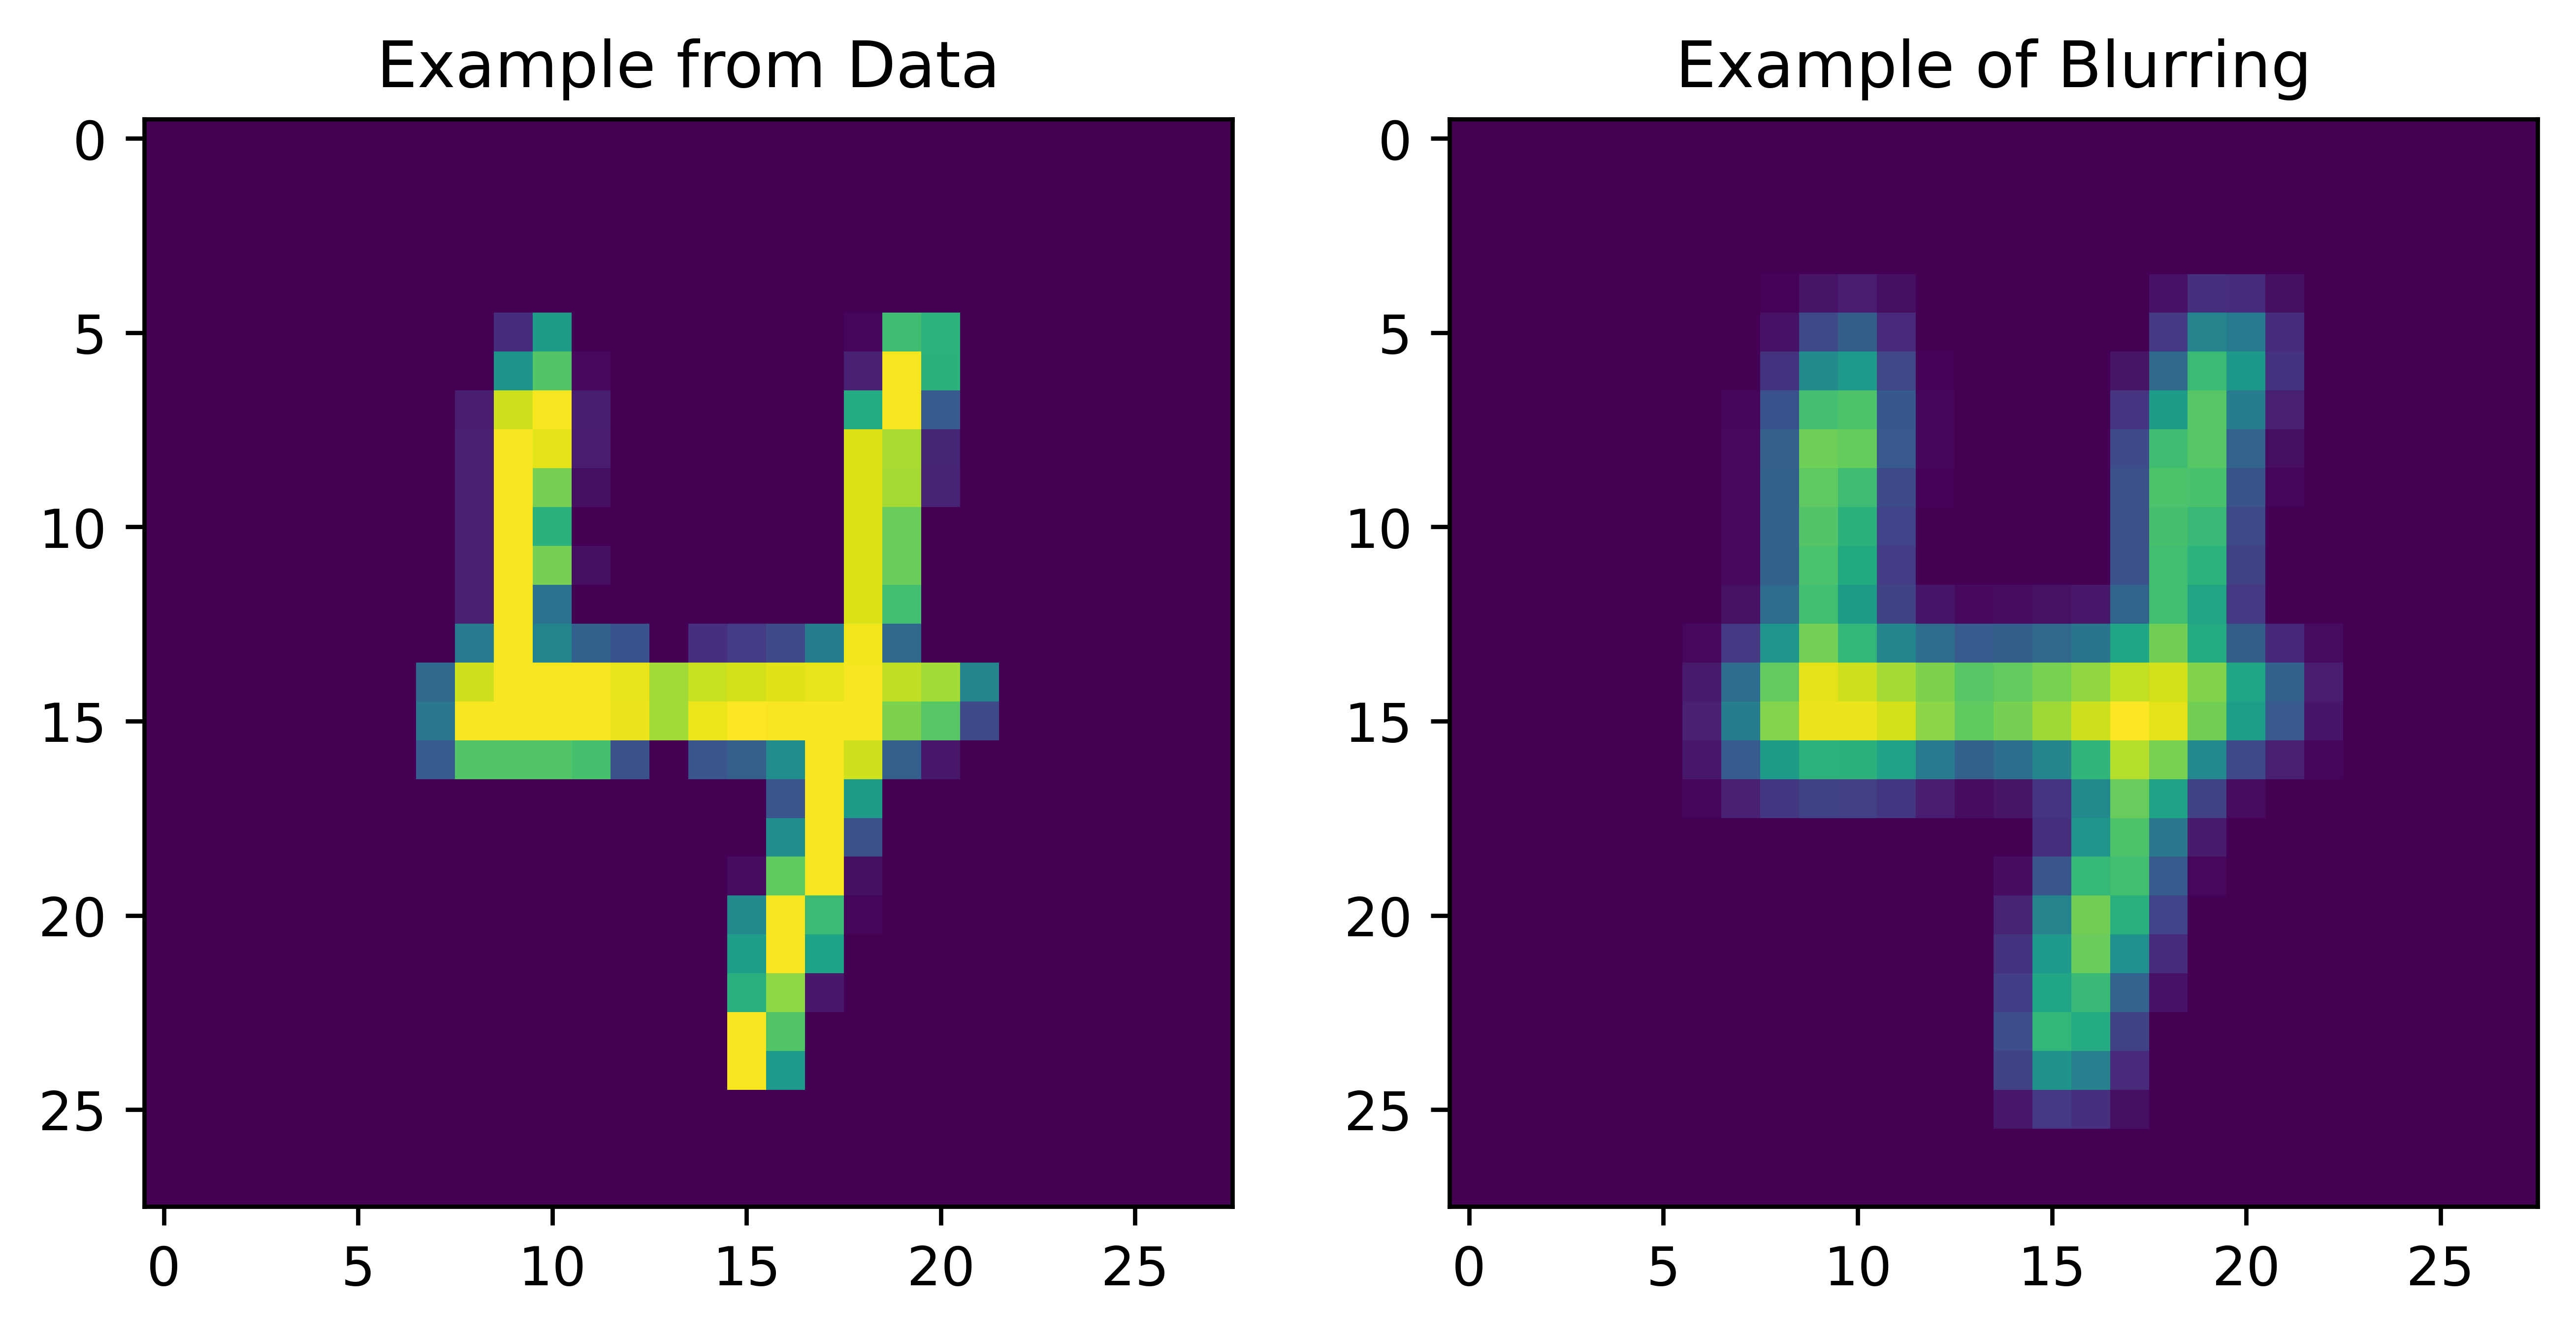

In [50]:
def Q1():
    
### STUDENT START ###

    def gaussian(image, weight=1):
        """apply a simplified gaussian blur filter to 8 neighboring pixels"""
                
        #weights for 3x3 to use for blurring
        weights = np.array([[1,2,1],
                        [2,4,2],
                        [1,2,1]])
        weights = weights**weight
        weights = weights/weights.sum()
        weights
                
        blurred_image = np.ones((28,28))
        #add padding
        image_pad = np.pad(image.reshape(28,28), (1, 1))
        #applies weights to calculate blurred image
        for i in range(28):
            for j in range(28):
                blurred_image[i,j] = (image_pad[i:i+3,j:j+3]*weights).sum()
                    
        return blurred_image.reshape(784,)
       
    #example of digit bluring
    ax = plt.figure(figsize=(8, 4), dpi=X.shape[1])
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(mini_train_data[1].reshape(28,28))
    ax1.set_title("Example from Data")
    ax2 = plt.subplot(1, 2, 2)
    ax2.imshow(gaussian(mini_train_data[1]).reshape(28,28))
    ax2.set_title("Example of Blurring")
    
    #create 1 nearest neighbor model and print accuracies
    nn = KNeighborsClassifier(n_neighbors=1)
    
    #no filter
    nn.fit(mini_train_data,mini_train_labels)
    print("Accuracy with no filter:", nn.score(dev_data, dev_labels))
    
    #filter only on training
    blurred_train = np.apply_along_axis(gaussian, 1, mini_train_data)
    nn.fit(blurred_train,mini_train_labels)
    print("Accuracy with filter on Training Data ONLY:", nn.score(dev_data, dev_labels))
    
    #filter only on dev
    blurred_dev = np.apply_along_axis(gaussian, 1, dev_data)
    nn.fit(mini_train_data,mini_train_labels)
    print("Accuracy with filter on Dev Data ONLY:", nn.score(blurred_dev, dev_labels))
    
    #filter on both training and dev
    nn.fit(blurred_train,mini_train_labels)
    print("Accuracy with filter on BOTH Training and Dev:", nn.score(blurred_dev, dev_labels))
    
    #different weights
    other_weights = [0.5,1,2,5]
    for num in other_weights:
        blurred_train = np.apply_along_axis(gaussian, 1, mini_train_data, num)
        blurred_dev = np.apply_along_axis(gaussian, 1, dev_data, num)
        nn.fit(blurred_train,mini_train_labels)
        print("Weight:", num, "Accuracy:", nn.score(blurred_dev,dev_labels))
        

    
### STUDENT END ###

Q1()

ANSWER: Blurring allows for noise so having training data that is smoothed allows for dev data to better classify into the digit. We see higher accuracies with having the filter ONLY on the training data and having the filter on both the training data and dev data which we can assume that having a blurred filter for training helps classify dev data better.

### Question 2: Modeling your data and experimenting with different Naive Bayes models. 
---

1. Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.
  1. For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.
  1. For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Here you'll likely need to implement a `trianarize` helper function. Since we are going beyond the binary representation of our features, you should use `MultinomialNB` to produce the model.
1. Show the Bernoulli model accuracy and the Multinomial model accuracy.
1. Does the multinomial version improve the results? Why or why not?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.



In [231]:
# Solution with binarization by explicit binarize function

def Q2():

### STUDENT START ###
    # First model using BernoulliNB with values 0 or 1
    bernoulli = BernoulliNB()
    bernoulli.fit(mini_train_data,mini_train_labels)
    print("Bernoulli Model Accuracy:", bernoulli.score(dev_data,dev_labels))
    
    # Second model using MultinomialNB with values 0, 1, or 2
    train_data_copy = mini_train_data.copy()
    # train data to be 0, 1, or 2 based on their values
    train_data_copy[np.where(mini_train_data < 0.1)] = 0
    train_data_copy[np.where((mini_train_data >= 0.1) & (mini_train_data < 0.9))] = 1
    train_data_copy[np.where(mini_train_data >= 0.9)] = 2
    
    multinomial = MultinomialNB()
    multinomial.fit(train_data_copy,mini_train_labels)
    print("Multinomial Model Accuracy:", multinomial.score(dev_data,dev_labels))

### STUDENT END ###

Q2()

Bernoulli Model Accuracy: 0.836
Multinomial Model Accuracy: 0.827


ANSWER: The multinomial version does not improve results. We can assume that by adding in another factor, grey, and adding noise to an area where noise does not need to be added. It seems to work better for the model using binary values with higher amounts of either black or white pixels to better the accuracy.

### Question 3: Applying the grid search technique.
1. Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.
1. What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.



In [179]:
def Q3(alphas):

### STUDENT START ###
    #make the bernoulli model
    bernoulli = BernoulliNB()
    
    #apply gridsearch
    gs = GridSearchCV(bernoulli, param_grid=alphas)
    gs.fit(mini_train_data, mini_train_labels)
    
    #print results for each alpha
    for i in range(len(alphas['alpha'])):
        print("Alpha: ", alphas['alpha'][i], "Accuracy: ", gs.cv_results_["mean_test_score"][i])

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
Q3(alphas)

Alpha:  1e-10 Accuracy:  0.8009999999999999
Alpha:  0.0001 Accuracy:  0.8089999999999999
Alpha:  0.001 Accuracy:  0.813
Alpha:  0.01 Accuracy:  0.8140000000000001
Alpha:  0.1 Accuracy:  0.8099999999999999
Alpha:  0.5 Accuracy:  0.806
Alpha:  1.0 Accuracy:  0.8049999999999999
Alpha:  2.0 Accuracy:  0.796
Alpha:  10.0 Accuracy:  0.755


ANSWER: The best value for alpha is 0.01 with an accuracy of 0.827. The accuracy when alpha is near 0 is most likely around 0.807. When inputting 0 to calculate, we get an error. This is interesting but we can make this estimate based on the trend we see with out test alpha values. The higher we make the alpha after 0.01, accuracy drops and we can start to see this on values less than 0.01 as well so we can see a sort of inverse parabola shape with the peak at or around 0.01.

### Question 4: Experimenting with Gaussian Naive Bayes
---
1. Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. 
1. Diagnose and explain the problem.
1. Apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. 
1. Show the model accuracy before your fix and the model accuracy after your fix.  
1. Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Take a look at var_smoothing argument for GaussianNB.
* Feel free to  examine theta and sigma to better understand what's happening. In general though, **it is not a good idea to mess with internal variables of the model**. These are stored in the model's `theta_` and `sigma_` attributes.

In [178]:
def Q4():

### STUDENT END ###
    #create and fit Gaussian model
    gaussian = GaussianNB()
    gaussian.fit(mini_train_data, mini_train_labels)
    print("Gaussian Model Accuracy:", gaussian.score(dev_data,dev_labels))
    
    # Improve Gaussian model
    # first test and found accuracy increases around 0.01-0.2
#     var_smooth = [1e-11, 1e-10, 1e-09, 1e-06, 0.00001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
    # second test with var_smoothing found best accuracy at 0.11
#     var_smooth = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12]
#     for i in range(len(var_smooth)):
#         gaussian_fix = GaussianNB(var_smoothing=var_smooth[i])
#         gaussian_fix.fit(mini_train_data, mini_train_labels)
#         print("Gaussian Model Fixed Accuracy:", gaussian_fix.score(dev_data,dev_labels), "with var_smoothing =", var_smooth[i])

    #Show final improved accuracy for cleaner look
    gaussian_fix = GaussianNB(var_smoothing=0.11)
    gaussian_fix.fit(mini_train_data, mini_train_labels)
    print("Gaussian Model Fixed Accuracy:", gaussian_fix.score(dev_data,dev_labels), "with var_smoothing = 0.11")

### STUDENT END ###

Q4()

Gaussian Model Accuracy: 0.568
Gaussian Model Fixed Accuracy: 0.815 with var_smoothing = 0.11


ANSWER: The default parameters for GaussianNB gave an accuracy of 0.568 which is much lower compared to our results with the Bernoulli model. The default parameters include var_smoothing = 1e-09 where var_smoothing is defined as "Portion of the largest variance of all features that is added to variances for calculation stability." This is assuming for a normal distribution however, we found that our distribution is not normal where things are either "black or white," aka one or another. So, we need to change this number to better our model. 

We need to find a number that better places weights on values that are not the most common. We found earlier that numbers between 0.1-0.9 are much less compared to numbers less than 0.1 and higher than 0.9. After testing different values and zoning in where I see a peak, I found that having var_smoothing = 0.11 gave us a fixed accuracy of 0.815 which is close to the accuracy found earlier for the Bernoulli model.

### Question 5: Naive Bayes as a generative model
---
Because Naive Bayes produces a generative model, you can use it to generate digit images.

1. Produce a Bernoulli Naive Bayes model and then use it to generate a 10x10 grid with 10 example images of each digit. Each pixel output will be either 0 or 1: randomly generating a number and then comparing it to the estimated probability of the pixel being either 0 or 1.  Show the grid.
1. How do the generated digit images compare to the training digit images?

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.



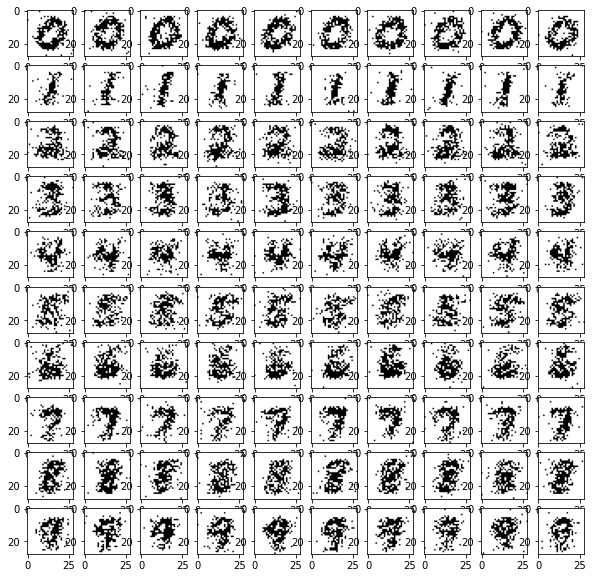

In [194]:
def Q5(num_examples):

### STUDENT START ###
    
    #create Bernoulli model and fit it
    bernoulli = BernoulliNB()
    bernoulli.fit(mini_train_data, mini_train_labels)
    #get probability
    prob = np.exp(bernoulli.feature_log_prob_)

    # make the plot size
    plt.figure(figsize=(num_examples,10))
    
    #for each digit being plotted
    for i in range(10):
        #for each example of the digit
        for example in range(num_examples):
            # keep images with higher probailities than random ones
            image = prob[i] > np.random.rand(X.shape[1])
        
            # make subplots for each item
            plt.subplot(10, num_examples, i*num_examples+example+1)
            # plot the pulled digit from the array created earlier
            digit = image.reshape((28,28))            
            plt.imshow(digit)
        

### STUDENT END ###

Q5(10)

ANSWER: The generated digits look like dispersed ink and fuzzy compared to the real ones that have much cleaner lines. We can vaguely make out which digit it is for each example but it seems much harder to distinguish what digit the example is showing if there were not other examples along side to help clarify.

### Question 6: Model Calibraiton
---
Recall that:
 * a **strongly calibrated** classifier is rougly 90% accurate when it says it is 90% accurate. The model's estimated posterior probability of the predicted class is indeed 0.9. 
 * A **weakly calibrated** classifier is more accurate when it "says" it is more accurate. The actual accuracy is higher when the model's estimated posterior probability is higher.
 * A **poorly calibrated** classifier has no positive correlation between the model's estimate posterior probability and the actual accuracy.

1. Produce a Bernoulli Naive Bayes model.  
1. Evaluate performance: 
  1. Partition the dev set into several buckets based on the estimated posterior probabilities of the predicted classes (predict_proba)
    - Think of it as a bin in a histogram, where each bin groups a range of estimated posterior probabilities of the predicted classes (predict_proba).
    - Then estimate the actual accuracy the classifier achieved for each bucket. 
    - So, for each prediction:
       - Find the bucket whose range includes the estimated posterior probability, 
       - and update "correct" and "total" counters accordingly. 
       - Show the accuracy for each bucket.
1. How would you characterize the calibration for this Bernoulli Naive Bayes model according to the definitions above?

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.



In [230]:
def Q6(buckets, correct, total):
    
### STUDENT START ###

    #create Bernoulli model and fit it
    bernoulli = BernoulliNB(binarize=0, alpha=0.01)
    bernoulli.fit(mini_train_data, mini_train_labels)
    #get estimated posterior probabilities of dev set
    prob = bernoulli.predict_proba(dev_data)

    #for each item in our dev data
    for i in range(len(dev_data)):
        
        #use this to check with bucket and update total and correct
        max_prob = max(prob[i])
        for j in range(len(buckets)):
            if max_prob <= buckets[j]:
                total[j] += 1
                
                #check if correct and update
                if prob[i].argmax(axis=0) == int(dev_labels[i]):
                    correct[j] += 1
                
                break
    
    #print everything
    for item in range(len(buckets)):
        print("Bucket:", buckets[item], "Correct:", correct[item], "Total:", total[item], "Accuracy:", (correct[item]/total[item]))

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

Q6(buckets, correct, total)

Bucket: 0.5 Correct: 0 Total: 1 Accuracy: 0.0
Bucket: 0.9 Correct: 9 Total: 19 Accuracy: 0.47368421052631576
Bucket: 0.999 Correct: 24 Total: 54 Accuracy: 0.4444444444444444
Bucket: 0.99999 Correct: 39 Total: 75 Accuracy: 0.52
Bucket: 0.9999999 Correct: 31 Total: 53 Accuracy: 0.5849056603773585
Bucket: 0.999999999 Correct: 31 Total: 48 Accuracy: 0.6458333333333334
Bucket: 0.99999999999 Correct: 46 Total: 55 Accuracy: 0.8363636363636363
Bucket: 0.9999999999999 Correct: 34 Total: 46 Accuracy: 0.7391304347826086
Bucket: 1.0 Correct: 625 Total: 649 Accuracy: 0.963020030816641


ANSWER: Our calibration for this Bernoulli Naive Bayes model seems to be weakly calibrated. We can see that the estimated posterior probabilities and accuracy are not positively correlated all the time.

### Question 7 EXTRA CREDIT: Feature generation
---
1. Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.
1. Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

**Note that improving results is actually hard.**

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try implementing [*maxpool*](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) features, taking a rolling maximum over sub-regions of a the image. 
- In any case, you can either transform the original data or add new "features" to it.

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [ ]:
def Q7():

### STUDENT START ###

### STUDENT END ###

Q7()